# Case study

I have been asked to perform data analysis for Fitness Konnect.  Fitness Konnect is a tech-driven wellness company aiming to create products for women to help encourage healthy habits. Their smart devices track activity, sleep, stress, reproductive health, and more. To help the business grow, they wanted to know how people are using smart devices and would like high-level recommendations to guide marketing strategy. To answer the business questions, I will follow 6 data analysis phases: Ask, Prepare, Process, Analyze, Share and Act.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas.api.types import CategoricalDtype

In [7]:
daily_activity = pd.read_csv("/Users/harishpanjikar/Desktop/F_konnect/dailyActivity_merged.csv")
weight = pd.read_csv('/Users/harishpanjikar/Desktop/F_konnect/weightLogInfo_merged.csv')
sleep_day = pd.read_csv('/Users/harishpanjikar/Desktop/F_konnect/sleepDay_merged.csv')
hourly_steps = pd.read_csv('/Users/harishpanjikar/Desktop/F_konnect/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('/Users/harishpanjikar/Desktop/F_konnect/hourlyCalories_merged.csv')

 #### Exploring how data is organised 

In [9]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [11]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [12]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [13]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


#### checking data types in each dataset

In [14]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [15]:
weight.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [16]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [17]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [18]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

#### Checking if there are any unique participants in each dataframe

In [20]:
daily_activity.Id.nunique()

33

In [21]:
weight.Id.nunique()

8

In [22]:
sleep_day.Id.nunique()

24

In [23]:
hourly_calories.Id.nunique()

33

In [24]:
hourly_steps.Id.nunique()

33

#### Verifying Data Integrity
Accessibility: The dataset is accessible and open with no copyright, which means it grants permission to use it for any purpose.

#### Limitations of Dataset
By looking at the results above, we can conclude that not all 33 participants have logged their weight or sleep information on the app.

The fact that the weight dataset only contains information from eight users could be a problem when it comes to making recommendations for the general public. Those users may not adequately represent the population, which could lead to biased results. For this reason, I will not include this dataset in the analysis.

#### Checking how many rows and columns are there in each dataframe

In [25]:
daily_activity.shape

(940, 15)

In [26]:
weight.shape

(67, 8)

In [27]:
sleep_day.shape

(413, 5)

In [28]:
hourly_steps.shape

(22099, 3)

In [29]:
hourly_calories.shape

(22099, 3)

#### Summary Statistics of dataset

In [30]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [31]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [32]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [33]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


#### Processing data from Dirty to Clean

#### Checking for empty cells

In [35]:
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [36]:
sleep_day.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

In [37]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [38]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

#### Checking duplicate values

In [39]:
daily_activity.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [40]:
sleep_day.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

In [41]:
hourly_steps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [42]:
hourly_calories.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

No duplicate rows found

#### Data Transformation 

In [43]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})


In [46]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

sleep_day = sleep_day.rename(columns={'SleepDay': 'Date'})

hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})

hourly_calories = hourly_calories.rename(columns={'ActivityHour' : 'Time'})

In [48]:
daily_activity


,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [49]:
sleep_day



,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [50]:
hourly_steps


,Id,Time,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


In [51]:
hourly_calories

,Id,Time,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126
22095,8877689391,5/12/2016 11:00:00 AM,192
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101


#### Data Formatting
Looking at the outputs above, we can see that the date column in all dataframes are of type object. We need to change the data type to datetime to perform calculations

In [52]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

sleep_day['Date'] = pd.to_datetime(sleep_day['Date'])

hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])

hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])

#### Creating a day of the week column
We can create a day of the week column deriving from the date column so we can better analyze our data.

In [53]:
daily_activity['DayOfWeek'] = daily_activity['Date'].dt.day_name()

hourly_steps['DayOfWeek'] = hourly_steps['Time'].dt.day_name()

In [55]:
daily_activity


,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday


In [56]:
hourly_steps

,Id,Time,StepTotal,DayOfWeek
0,1503960366,2016-04-12 00:00:00,373,Tuesday
1,1503960366,2016-04-12 01:00:00,160,Tuesday
2,1503960366,2016-04-12 02:00:00,151,Tuesday
3,1503960366,2016-04-12 03:00:00,0,Tuesday
4,1503960366,2016-04-12 04:00:00,0,Tuesday
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,Thursday
22095,8877689391,2016-05-12 11:00:00,1407,Thursday
22096,8877689391,2016-05-12 12:00:00,3135,Thursday
22097,8877689391,2016-05-12 13:00:00,307,Thursday


#### Merging datasets

Combining some of our datasets can make the analysis process easier and help us find trends in our data

In [57]:
# Merging daily_activity and sleep_day datasets
data_merged = pd.merge(daily_activity, sleep_day, on = 'Date')

# Renaming certain columns for readability
data_merged = data_merged.rename(columns={'Id_x' : 'Id_Activity'})
data_merged = data_merged.rename(columns={'Id_y' : 'Id_Sleep'})
data_merged.head()

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [58]:
# Merging hourly_steps and hourly_calories datasets
hourly_merged = pd.merge(hourly_steps, hourly_calories, on=['Time', 'Id'])
hourly_merged.head()

,Id,Time,StepTotal,DayOfWeek,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


In [61]:
# find out how many days were recorded on this dataframe
hourly_merged['Time'].max() - hourly_merged['Time'].min()

Timedelta('30 days 15:00:00')

#### Analyzing and Visualizing Data

#### Activity Data

We will begin by taking a closer look on more specific information surrounding our users activity.

#### Analyzing Total Steps and Calories

How many steps do our users take daily? How active are they? Does the total number of steps have any correlation to the amount of burned calories?

We should be able to answer these questions through analysis.

In [62]:
daily_activity.agg(
    {'TotalSteps': ['mean', 'min', 'max'],
     'Calories': ['mean', 'min', 'max'],  
    })

,TotalSteps,Calories
mean,7637.910638,2303.609574
min,0.000000,0.000000
max,36019.000000,4900.000000


#### Now, let's take a look at the relationship between the total number of steps and calories:

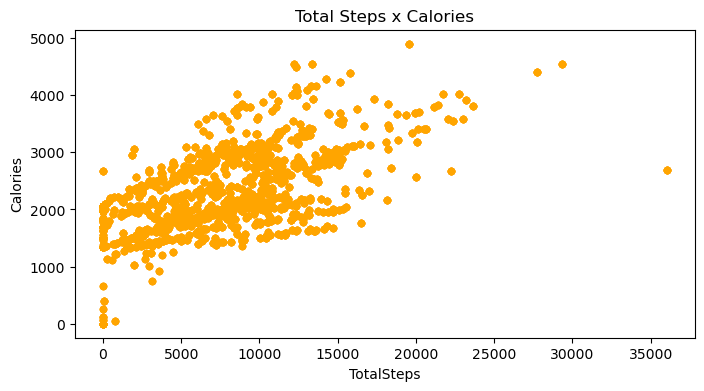

In [71]:
data_merged.plot.scatter(x='TotalSteps', y='Calories', color='orange', alpha=0.5, figsize=(8,4))
plt.title('Total Steps x Calories')
plt.show()

 **Analysis** - As we can see on the scatter plot above, there is a positive relationship between the two variables, which indicates that the greater the number of steps taken, the more calories user burns. As mentioned above, keeping active is crucial for maintaining good health, and the number of steps the individual takes daily has a significant impact on that.

#### Analyzing Total Steps by Day of the Week

Are the users consistent on the number of total steps taken throughout the week? Or are there significant changes as the days go by?

In [73]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories= cats, ordered= True)
data_merged['DayOfWeek']= data_merged['DayOfWeek'].astype(cat_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)
df_weekday.filter(["TotalSteps"])

,TotalSteps
DayOfWeek,
Monday,7755.040426
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7651.824517
Friday,7449.285319
Saturday,8159.764314
Sunday,6943.197226


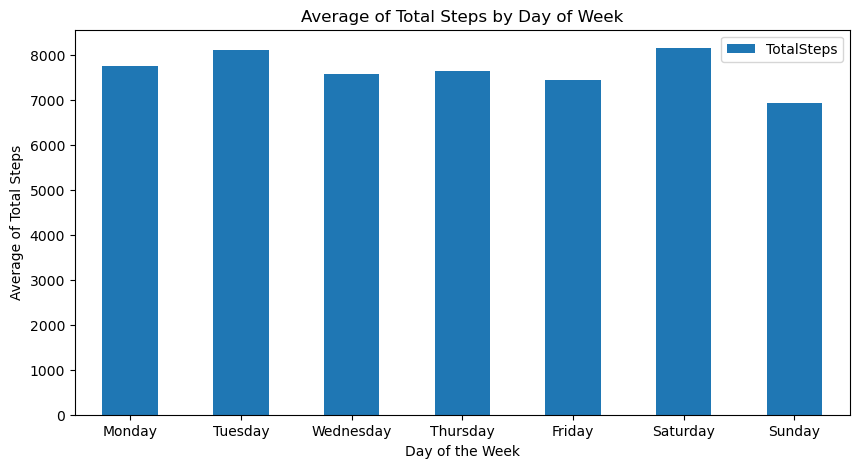

In [78]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day of the Week', ylabel='Average of Total Steps', title='Average of Total Steps by Day of Week', legend=True, rot=0, figsize=(10,5))
plt.show()

Analysis - This graph shows us the average total steps taken by the users throughout the week. We can see that the most active day in terms of steps taken is Saturday, followed by Tuesday. The least active day is Sunday - most likely a rest day for the users. This visualization shows us that the users seem to be consistent with their total steps scores.



#### Analyzing the Most Active Time of Day

What are the most active hours of the users' day on average? Are they occurring during the day or at night?

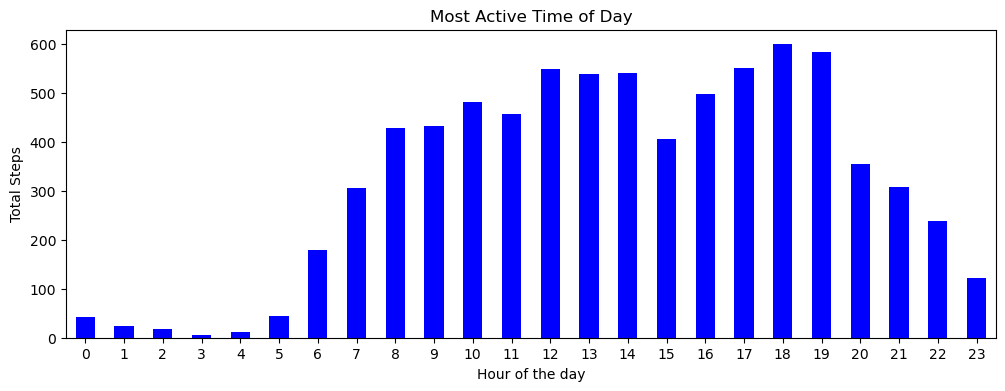

In [79]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='blue', title='Most Active Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Total Steps")
plt.show()

**Analysis** - This bar graph tells us that the users tend to start becoming more active between 7 and 8 am. The level of activity stays doesn't change dramatically throughout the day, but the peak hours seem to occur between 6 and 7 pm. Our users are likely choosing to work out after work/school hours.

Note that their levels of activity start decreasing significantly at 8 pm and keep going down as the hours' progress. The users seem to go to bed at a reasonable time, as lower levels of activity are recorded at late hours of the night.

#### Analyzing the Time of Day Users Burn the Most Calories

We learned from a previous visualization that there is a positive correlation between the total amount of steps walked and burned calories. Let's see if the burned calories are fluctuating as much as the activity levels.

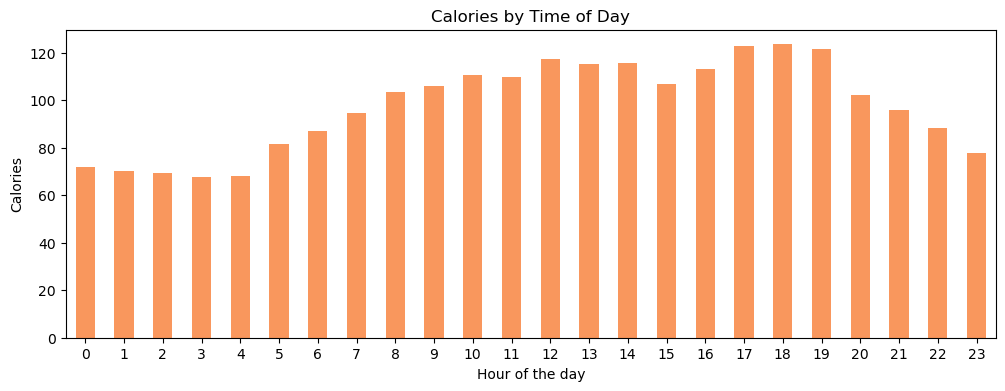

In [80]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='#F9975D', title='Calories by Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories")
plt.show()

According to above graph, we burn around 50 calories an hour while we sleep - and we are able to see that in the graph above. Observe that as the users wake up and start moving, the number of burned calories increases, peaking around the same time that the users are most active during the day.

#### Analyzing the Different Categories of Activity

* How active are the users throughout the day? 
* Do they spend a significant portion of their day being very active or, perhaps, not active enough?

In [81]:
daily_activity.agg(
    {'VeryActiveMinutes': ['mean', 'min', 'max'],
     'FairlyActiveMinutes': ['mean', 'min', 'max'],
     'LightlyActiveMinutes': ['mean', 'min', 'max'],
     'SedentaryMinutes': ['mean', 'min', 'max'],   
    })

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,21.164894,13.564894,192.812766,991.210638
min,0.000000,0.000000,0.000000,0.000000
max,210.000000,143.000000,518.000000,1440.000000


If we take a closer look into the average time spent on the different categories of active minutes, we can see that the amount of time the users spend being sedentary is quite significant. If we do the math, we learn that the users are Sedentary for, on average, 16.5 hours of their day. They spend about 3.2 hours of their day being Lightly Active, 23 minutes being Fairly Active, and 35 minutes being Very Active.

#### We can visualize this distribution of time in percentages by plotting the following pie chart:

#### Average of Minutes Spent in Each Activity Category

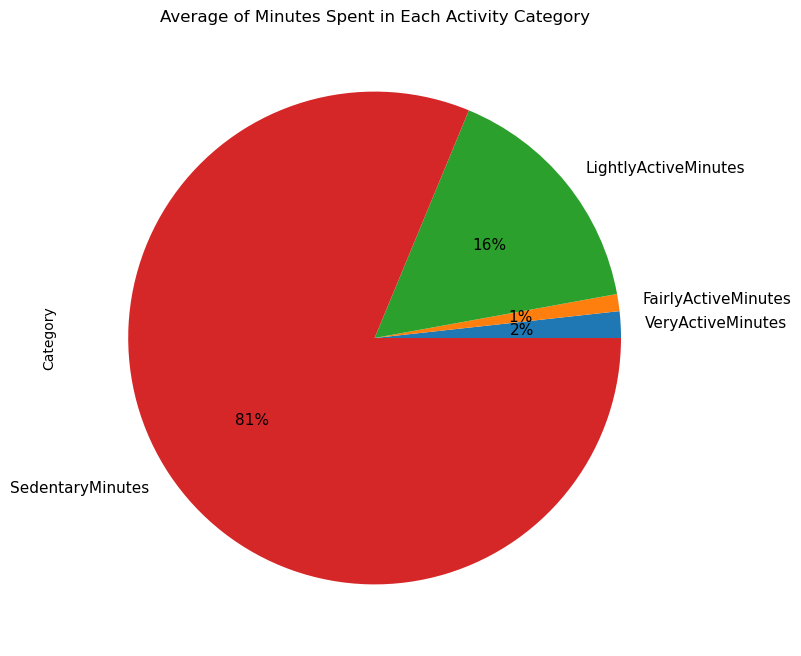

In [86]:
minutes_categories = data_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category',autopct='%1.0f%%', fontsize='11', startangle=0, figsize=(10,8))
plt.show()

The experts recommend at least 30 minutes of moderate daily physical activity. It is also said that reducing sitting time is important to avoid one's risk of developing metabolic problems. We can conclude from our data that, even though our users are being very active for over 30 minutes every day, they are still spending an enormous amount of time being sedentary, which could result in future health issues.

#### Sleep Data

Now, let's look into our users' sleeping habits.

In [87]:
sleep_day.agg(
    {'TotalMinutesAsleep': ['mean', 'min', 'max'],
     'TotalTimeInBed': ['mean', 'min', 'max'],   
    })

,TotalMinutesAsleep,TotalTimeInBed
mean,419.467312,458.639225
min,58.000000,61.000000
max,796.000000,961.000000


According to experts, an adult between 18-60 years old should get 7 or more hours of sleep per night. By analyzing the TotalMinutesAsleep column, we learn that, on average, our users' sleeping time is 419.5 minutes (or 7 hours). We can, therefore, conclude that they have good sleeping habits.

Now, let's take a look at the TotalTimeInBed column. It shows that the average total time spent in bed is 458.6 minutes (or 7.6 hours). We can use a scatter plot to better visualize the relationship between TotalMinutesAsleep and TotalTimeInBed:

#### Total Minutes Asleep x Total Time in Bed

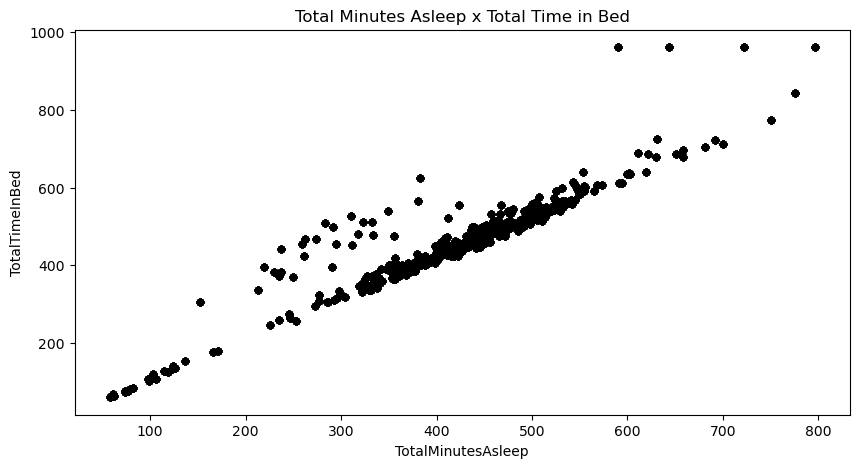

In [89]:
data_merged.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', color='black', alpha=0.5, figsize=(10,5))
plt.title('Total Minutes Asleep x Total Time in Bed')
plt.show()

The scatter plot shows a strong positive linear association between the total number of minutes asleep and the total time spent in bed, which means that most users are usually in bed only when they are sleeping, and not much longer before or after that. However, we can still see that, at times, they do spend a larger amount of time in bed without being asleep. This could be related to the weekends when many people choose to sleep in or relax.

Let's take a step further in our analysis and check the average of minutes asleep by day of the week:

#### Average of Minutes Asleep by Day of the Week

In [90]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(cat_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)
df_weekday.filter(['TotalMinutesAsleep'])

,TotalMinutesAsleep
DayOfWeek,
Monday,418.245390
Tuesday,404.815617
Wednesday,434.566434
Thursday,401.504069
Friday,405.504155
Saturday,420.766537
Sunday,453.702051


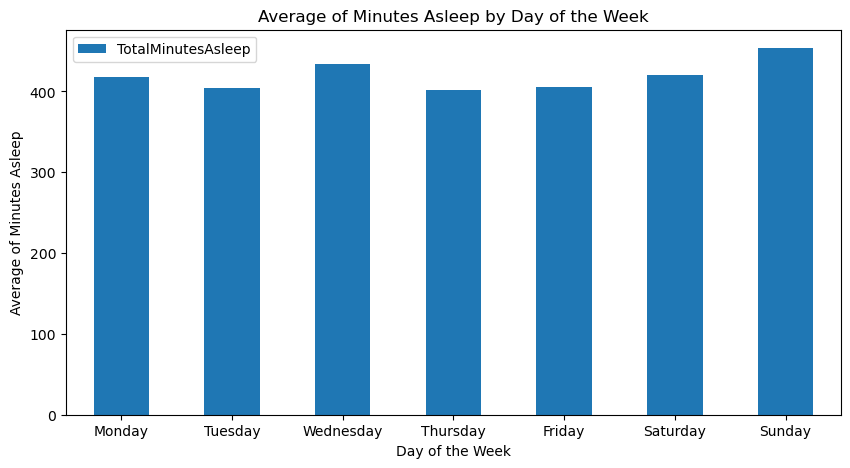

In [91]:
df_weekday['TotalMinutesAsleep'].plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes Asleep', title='Average of Minutes Asleep by Day of the Week', legend=True, rot=0, figsize=(10,5))
plt.show()

In the bar graph above, we can see that the average Total Minutes Asleep goes above the 400-minute mark - 419.8 minutes to be exact - with Sunday (7.6 hours) and Wednesday (7.2 hours) being the days where the users seem to have slept the most. It is clear from this visualization that there are no significant changes in sleeping time throughout the week. This information shows us that the users have a consistent sleeping schedule.

By analyzing the bar graph above, we can see that Sunday records the highest number of the Total Minutes Asleep average. If we go back to the "Average of Total Steps by Day of the Week" graph, we learn that Sunday also recorded the lowest number of the total steps average in the week, showing us that Sunday is likely the users' choice of a rest day.

#### Analyzing Awake Time in Bed by Day of the Week

Now, let's take a look at how much time the users are spending in bed without being asleep throughout the week.

In [92]:
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])
df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed']]
df_weekday['AwakeTimeInBed'] = df_weekday['TotalTimeInBed'] - df_weekday['TotalMinutesAsleep']
time_bed = df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed', 'AwakeTimeInBed']]
time_bed

,TotalMinutesAsleep,TotalTimeInBed,AwakeTimeInBed
DayOfWeek,,,
Monday,418.245390,455.711348,37.465957
Tuesday,404.815617,443.471033,38.655416
Wednesday,434.566434,470.421578,35.855145
Thursday,401.504069,435.150560,33.646490
Friday,405.504155,445.150693,39.646537
Saturday,420.766537,461.246804,40.480267
Sunday,453.702051,504.556695,50.854644


In [93]:
# Average Awake Time in Bed
time_bed['AwakeTimeInBed'].mean()

39.514922373626526

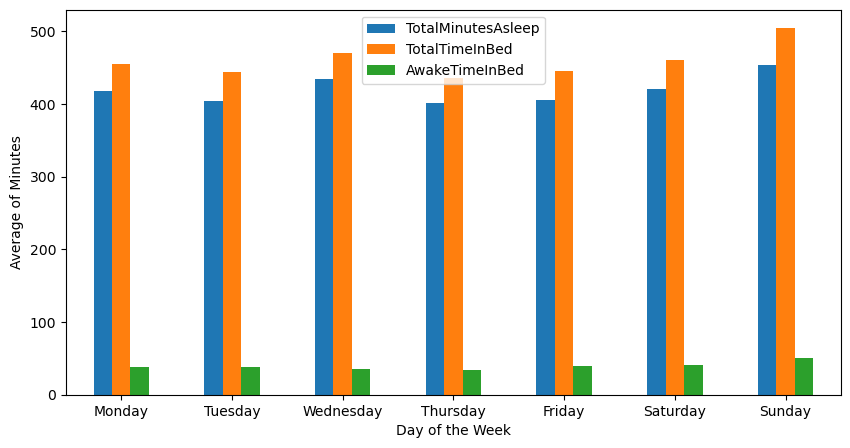

In [94]:
# Plotting the Graph
time_bed.plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes', rot=0, figsize=(10,5))
plt.show()

As we can see, the users are very consistent with their time in bed throughout the days of the week, and the same goes for the time they are awake in bed. From their total time in bed, they spend, on average, 39.5 minutes awake. The longest recorded times occurred on the weekend, which is perfectly understandable.

### ACT

#### Recommendations

The following recommendations were carefully created to help guide Fitness Konnect's marketing strategy:

**Personalized Notifications to Promote Activity:** The users' average of total steps is 7,638 – a mark well below the 10,000 daily steps recommended by the Experts. In addition, our analysis has shown that the average user spent about 81% of their day being sedentary. Fitness Konnect could incorporate personalized notifications on its app to motivate users to keep moving throughout the day. Such notifications could include real-time information regarding the number of steps taken so far, or even the number of steps left in order to reach the daily goal.

**Dynamic Calorie Counter:** The app could also provide the user with an elegantly designed, easy-to-use interface that displays the number of calories that are being burned throughout the day to improve motivation. The user could also have the option to set their customized daily calories goal and be able to follow their progress throughout the day.

**Detailed Sleeping Log:** The average user has a consistent sleeping schedule, but those who may want to improve the quality of their sleep - or simply keep track of it - could benefit from a sleeping log. The app could offer this feature and record sleep quality, the number of times one wakes up during the night, the total amount of awake time in bed, anxiety, and/or stress levels.

**Weekly and Monthly Achievement Reports:** To keep the users motivated, the Fitness Konnect could provide customized weekly and monthly reports regarding the total number of steps, burned calories, sleeping habits, weight loss, and total time spent on the different activity levels. The app could send congratulatory messages to those who keep up with good habits, as well as motivational tips for improvement depending on the user's overall performance.

**Meditation and Relaxation Services:** Fitness Konnect could also offer meditation and relaxation tips and services - either for free or on a premium basis - to those who are looking to improve their sleep quality and/or reduce stress and anxiety levels. By tracking the time of day when the user decreases their activity levels, their rest days, or perhaps around bedtime, the app could send notifications to the person's phone or a smart device and suggest different meditation or relaxation techniques.
